# The Correlation Problem

### Loading Libraries

In [1]:
# Numerical Computing
import numpy as np

# Data Manipulation
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# SHAP
import shap

# Tabulate
from tabulate import tabulate

## Building Sample Data

#### Correlated Features Cause Extrapolation

In [2]:
# Random Seed
np.random.seed(42)

In [6]:
p = 0.9

# Mean Vector
mean = [0, 0]

# Covariance Matrix
cov = [[1, p], [p, 1]]

# Samples
n = 100

x1, x2 = np.random.multivariate_normal(mean, cov, n).T

In [7]:
# Sampling Base Simulator
point = (-1.7, -1.7)

# Sample Set
m = 15

In [8]:
# Marginal & Conditional Distribution
x2_cond = np.random.normal(
    loc=p*point[0], 
    scale=np.sqrt(1-p**2), 
    size=m
)

x2_marg = np.random.choice(x2, size=m)

#### Plotting

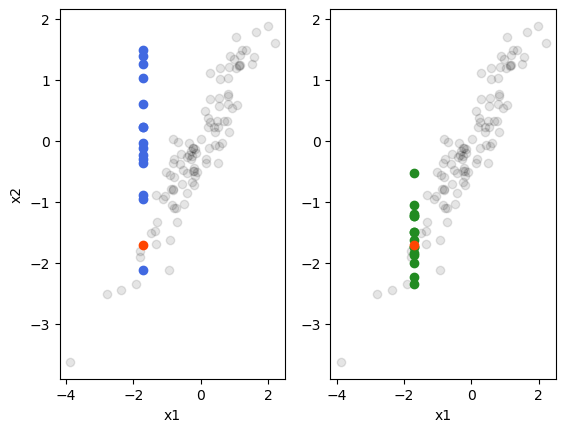

In [10]:
plt.subplot(121)
plt.scatter(x1, x2, color='black', alpha=0.1)
plt.scatter(np.repeat(point[0], m), x2_marg, color='royalblue')
plt.scatter(point[0], point[1], color='orangered')
plt.ylabel('x2')
plt.xlabel('x1')
plt.subplot(122)
plt.scatter(x1, x2, color='black', alpha=0.1)
plt.scatter(np.repeat(point[0], m), x2_cond, color='forestgreen')
plt.scatter(point[0], point[1], color='orangered')
plt.xlabel('x1')
plt.show()